In [4]:
import os
os.system('ipcluster start --engines=MPIEngineSetLauncher &')

0

In [5]:
from IPython.parallel import Client
rc = Client()

In [6]:
rc.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [7]:
%autopx

%autopx enabled


In [8]:
from mpi4py import MPI

MPI.COMM_WORLD.Get_rank()


Out[0:1]: 5

Out[1:1]: 3

Out[2:1]: 12

Out[3:1]: 1

Out[4:1]: 13

Out[5:1]: 4

Out[6:1]: 2

Out[7:1]: 0

Out[8:1]: 14

Out[9:1]: 8

Out[10:1]: 10

Out[11:1]: 9

Out[12:1]: 7

Out[13:1]: 15

Out[14:1]: 6

Out[15:1]: 11

In [9]:
import os, sys
print os.getenv("PATH")
print sys.path

[stdout:0] 
/home1/02744/earnric/.local/bin:/home1/02744/earnric/bin:/opt/apps/intel14/hdf5/1.8.13/x86_64/bin:/opt/apps/intel14/mvapich2_2_0/python/2.7.6/bin:/opt/apps/intel14/mvapich2/2.0b/bin:/opt/apps/intel/13/vtune_amplifier_xe_2013/bin64:/opt/apps/intel/13/composer_xe_2013_sp1.1.106/mpirt/bin/intel64:/opt/intel/sep/bin:/opt/apps/xalt/0.4.6/bin:/usr/lib64/qt-3.3/bin:/usr/local/bin:/bin:/usr/bin:/usr/X11R6/bin:/opt/ofed/bin:/opt/ofed/sbin:.:/opt/apps/intel/13/composer_xe_2013_sp1.1.106/bin/intel64:/opt/apps/intel/13/composer_xe_2013_sp1.1.106/bin/intel64_mic:/opt/apps/intel/13/composer_xe_2013_sp1.1.106/debugger/gui/intel64
['', '', '', '/home1/02744/earnric/.local/lib/python2.7/site-packages/Cython-0.21.2-py2.7-linux-x86_64.egg', '/home1/02744/earnric/.local/lib/python2.7/site-packages/yt-3.1dev-py2.7-linux-x86_64.egg', '/opt/apps/intel14/mvapich2_2_0/python/2.7.6/lib/python2.7/site-packages/matplotlib-1.4.0-py2.7-linux-x86_64.egg', '/opt/apps/intel14/mvapich2_2_0/python/2.7.6/lib/

In [10]:
import yt

CompositeError: one or more exceptions from call to method: execute
[0:execute]: ImportError: libhdf5.so.8: cannot open shared object file: No such file or directory
[1:execute]: ImportError: libhdf5.so.8: cannot open shared object file: No such file or directory
[2:execute]: ImportError: libhdf5.so.8: cannot open shared object file: No such file or directory
[3:execute]: ImportError: libhdf5.so.8: cannot open shared object file: No such file or directory
.... 12 more exceptions ...

In [8]:
import yt
yt.enable_parallelism()
import numpy as np
import os
import shutil
import h5py
import gc
import glob

CompositeError: one or more exceptions from call to method: execute
[0:execute]: AttributeError: 'module' object has no attribute 'utilities'
[1:execute]: AttributeError: 'module' object has no attribute 'utilities'
[2:execute]: AttributeError: 'module' object has no attribute 'utilities'
[3:execute]: AttributeError: 'module' object has no attribute 'utilities'
.... 12 more exceptions ...

In [15]:
%matplotlib inline

In [ ]:
ds = yt.load("./output_00021/info_00021.txt")

In [ ]:
yt.__version__

In [5]:
ad = ds.all_data()

In [6]:
partIDs = ad.particles["particle_identifier"] # The "=" doesn't seem to add anything... 

yt : [INFO     ] 2015-01-20 16:43:14,882 Getting particle_identifier using ParticleIO


error: unpack requires a string argument of length 4

In [7]:
ds.domain_width.in_units("kpc")

YTArray([ 292.63566273,  292.63566273,  292.63566273]) kpc

In [8]:
physSize =ds.domain_width.in_units("kpc")[0]
print physSize

292.635662732 kpc


In [9]:
z = "%.2f"%ds.current_redshift
print z

13.41


In [10]:
zString = "z = %.2f" % ds.current_redshift
print zString

z = 13.41


In [11]:
# Make a density projection centered on the 'm'aximum density location
# with a width of 50 kpc..
p = yt.ProjectionPlot(ds, "y", "density", center='m', width=(50, 'kpc'))

# Modify the projection
# The argument specifies the region along the line of sight
# for which particles will be gathered.
# 1.0 signifies the entire domain in the line of sight
# p.annotate_particles(1.0)
# but in this case we only go 50 kpc in depth

#p.annotate_particles((50, 'kpc'))

p.annotate_title(zString)
p.show()

error: unpack requires a string argument of length 4

In [6]:
dd = ds.all_data()

In [30]:
dd.quantities.total_mass()

[9.39990796285e+44 g, 4.63734349708e+45 g]

In [33]:
ds.field_info("Density")

TypeError: 'RAMSESFieldInfo' object is not callable

In [51]:
ad.field_parameters

{'bulk_velocity': YTArray([ 0.,  0.,  0.]) cm/s,
 'center': YTArray([ 0.5,  0.5,  0.5]) code_length,
 'normal': YTArray([ 0.,  0.,  1.]) (dimensionless)}

In [37]:
ds.field_list

[('ramses', 'Density'),
 ('ramses', 'x-velocity'),
 ('ramses', 'y-velocity'),
 ('ramses', 'z-velocity'),
 ('ramses', 'Pressure'),
 ('ramses', 'Metallicity'),
 ('ramses', 'var6'),
 ('ramses', 'var7'),
 ('io', 'particle_refinement_level'),
 ('io', 'particle_position_z'),
 ('io', 'particle_position_x'),
 ('io', 'particle_velocity_z'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_position_y'),
 ('io', 'particle_metallicity'),
 ('io', 'particle_mass'),
 ('io', 'particle_identifier'),
 ('io', 'particle_age'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_z'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_age'),
 ('all', 'particle_refinement_level'),
 ('all', 'particle_identifier'),
 ('all', 'particle_velocity_z'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y')]

In [38]:
re = ds.region([0.5,0.5,0.5], [0.0,0.0,0.0], [1.0,1.0,1.0])

In [41]:
ds["particle_identifier"]

KeyError: 'particle_identifier'

In [22]:
ct = re["creation_time"]

YTFieldNotFound: Could not find field '('all', 'creation_time')' in info_00011.

In [11]:
import matplotlib.pyplot as plt 

In [13]:
len(re["particle_position"])

134222284

yt : [INFO     ] 2015-01-14 20:56:40,829 Loading field plugins.
yt : [INFO     ] 2015-01-14 20:56:40,829 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-01-14 20:56:40,830 Loaded astro (15 new fields)
yt : [INFO     ] 2015-01-14 20:56:40,830 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-01-14 20:56:40,831 Loaded fluid (62 new fields)
yt : [INFO     ] 2015-01-14 20:56:40,832 Loaded fluid_vector (94 new fields)
yt : [INFO     ] 2015-01-14 20:56:40,833 Loaded geometric (110 new fields)
yt : [INFO     ] 2015-01-14 20:56:40,833 Loaded local (110 new fields)
yt : [INFO     ] 2015-01-14 20:56:40,834 Loaded magnetic_field (118 new fields)
yt : [INFO     ] 2015-01-14 20:56:40,834 Loaded my_plugins (118 new fields)
yt : [INFO     ] 2015-01-14 20:56:40,835 Loaded species (120 new fields)


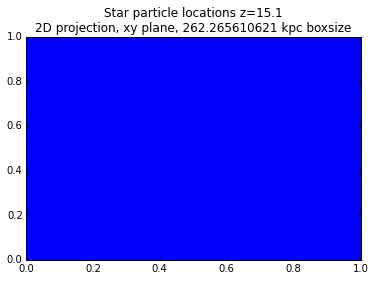

In [12]:
plt.plot(re["particle_position"][:,0],re["particle_position"][:,1],'.')
plt.title("Star particle locations z=%.1f\n2D projection, xy plane, %s boxsize"%(ds.current_redshift,physSize))

In [12]:
my_sphere = ds.sphere("c", physSizeNC)


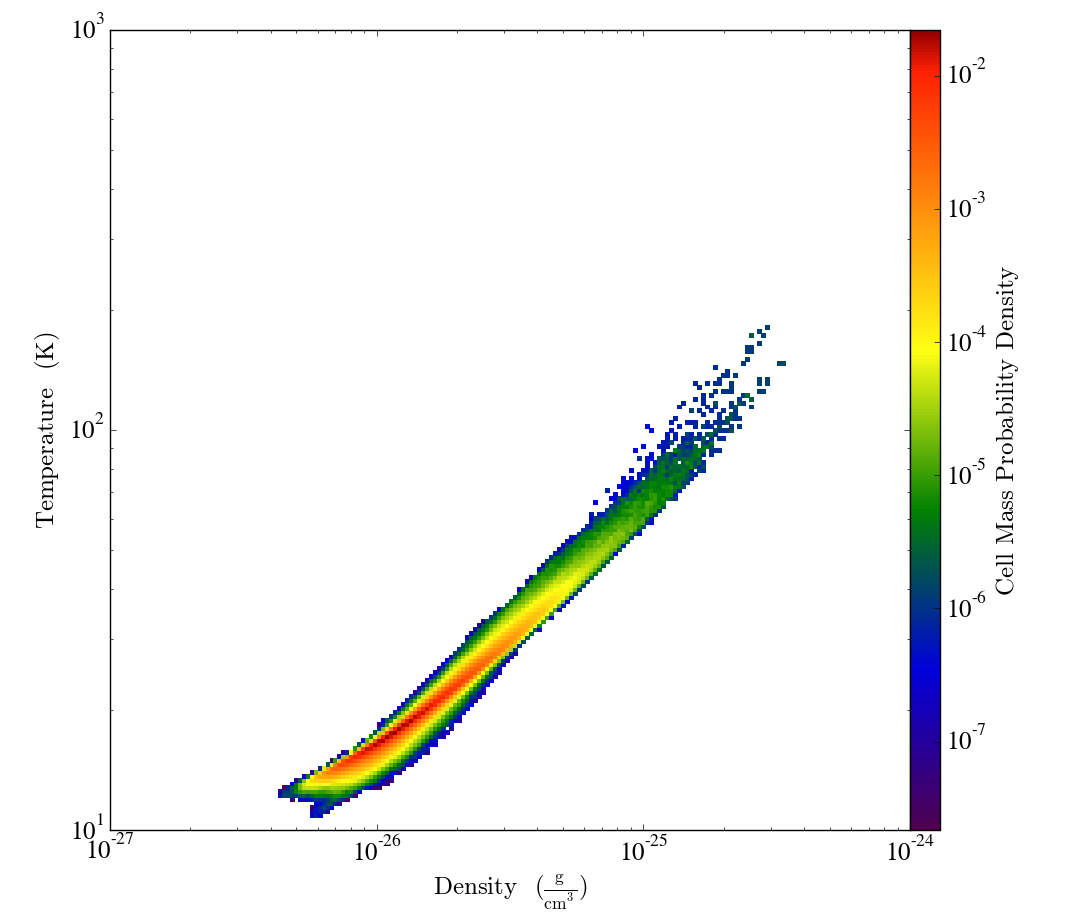

In [16]:
# fractional=True keyword -- divide the profile data by the sum. 
plot2 = yt.PhasePlot(my_sphere, "density", "temperature", "cell_mass", weight_field=None, fractional=True )
plot2.show()


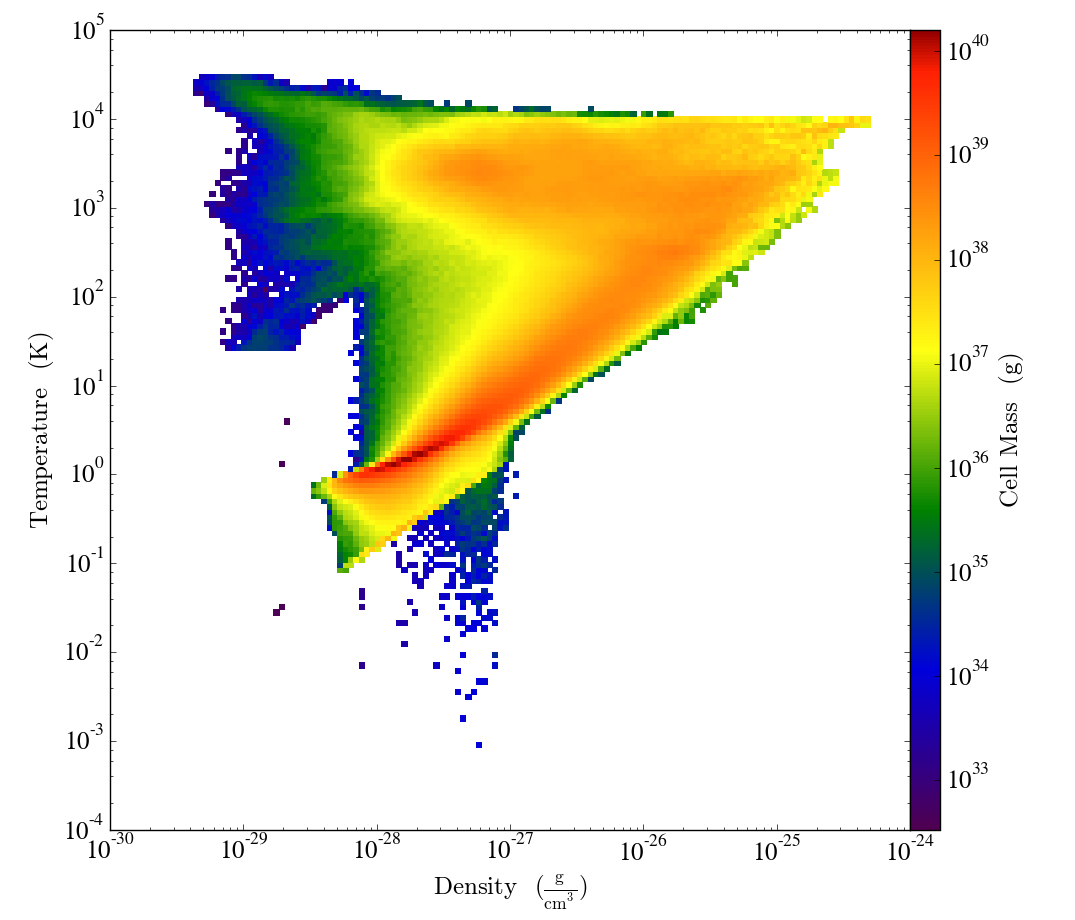

In [15]:
plot2 = yt.PhasePlot(my_sphere, "density", "temperature", "cell_mass", weight_field=None, fractional=False )
plot2.show()